In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_csv('Dataset/LabelEncoded_cleaned_adult.csv')

In [3]:
df.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,15,38,0
2,38,2,215646,5,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,3,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,10,2,3,5,4,0,0,0,40,38,0
6,49,2,160187,1,3,7,1,2,0,0,0,16,22,0
7,52,4,209642,5,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,10,4,9,1,4,0,8614,0,50,38,1
9,42,2,159449,9,2,3,0,4,1,5178,0,40,38,1


# Standard Scaler

In [4]:
X = df.drop(['income'], axis=1) # Features
y = df['income'] # Label

In [5]:
scaler = StandardScaler()
X_scaler = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [6]:
X_scaler.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.045047,2.91625,-1.143681,1.167059,0.943267,-1.482668,-0.258452,0.384230,0.693823,0.925509,-0.221044,-0.079995,0.262722
1,0.903172,1.87300,-1.083321,1.167059,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.276684,-0.221044,-2.367993,0.262722
2,-0.032964,-0.21350,0.295068,-0.460386,-1.722363,-0.240991,-0.258452,0.384230,0.693823,-0.276684,-0.221044,-0.079995,0.262722
3,1.137205,-0.21350,0.493751,-1.274109,-0.389548,-0.240991,-0.884386,-2.018206,0.693823,-0.276684,-0.221044,-0.079995,0.262722
4,-0.813077,-0.21350,1.573755,1.167059,-0.389548,0.752350,2.245285,-2.018206,-1.441290,-0.276684,-0.221044,-0.079995,-5.330650
5,-0.110976,-0.21350,1.013099,1.573921,-0.389548,-0.737662,2.245285,0.384230,-1.441290,-0.276684,-0.221044,-0.079995,0.262722
6,0.825160,-0.21350,-0.282588,-2.087831,0.276860,0.255680,-0.258452,-2.018206,-1.441290,-0.276684,-0.221044,-2.276473,-2.369453
7,1.059194,1.87300,0.232531,-0.460386,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.276684,-0.221044,0.377605,0.262722
8,-0.579043,-0.21350,-1.474230,1.573921,0.943267,0.752350,-0.258452,0.384230,-1.441290,4.486741,-0.221044,0.835205,0.262722
9,0.279081,-0.21350,-0.290275,1.167059,-0.389548,-0.737662,-0.884386,0.384230,0.693823,2.586680,-0.221044,-0.079995,0.262722


In [7]:
# Calculate the standard deviation of all columns
std_X = X_scaler.std()
print('Standard Deviation after Performing Standard Scaler: \n',std_X)

Standard Deviation after Performing Standard Scaler: 
 age               1.000011
workclass         1.000011
fnlwgt            1.000011
education-num     1.000011
marital-status    1.000011
occupation        1.000011
relationship      1.000011
race              1.000011
sex               1.000011
capital-gain      1.000011
capital-loss      1.000011
hours-per-week    1.000011
native-country    1.000011
dtype: float64


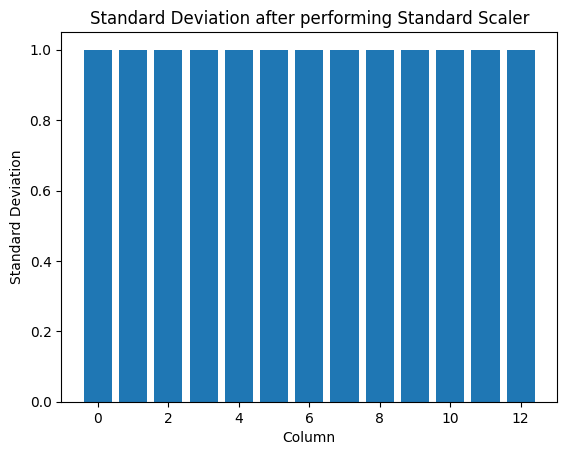

In [8]:
# Plot the Standard Deviation of all columns
plt.bar(range(len(std_X)), std_X)
plt.title("Standard Deviation after performing Standard Scaler")
plt.xlabel("Column")
plt.ylabel("Standard Deviation")
plt.show()

In [9]:
# Calculate the mean of all columns
mean_X = X_scaler.mean()
print('Mean after Performing Standard Scaler: \n',mean_X)

Mean after Performing Standard Scaler: 
 age               2.535462e-16
workclass         1.170213e-16
fnlwgt            7.691320e-17
education-num    -1.325927e-16
marital-status    1.038092e-17
occupation        5.662322e-17
relationship      6.291469e-19
race             -9.122629e-17
sex              -8.996800e-17
capital-gain      3.900711e-17
capital-loss      3.074955e-17
hours-per-week    3.002603e-16
native-country    9.122629e-17
dtype: float64


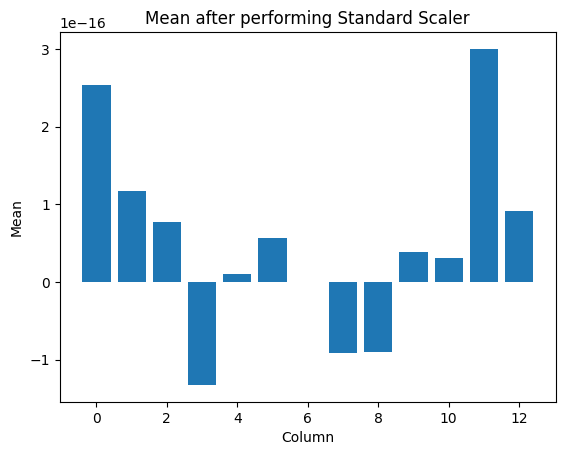

In [10]:
# Plot the Mean of all columns
plt.bar(range(len(mean_X)), mean_X)
plt.title("Mean after performing Standard Scaler")
plt.xlabel("Column")
plt.ylabel("Mean")
plt.show()

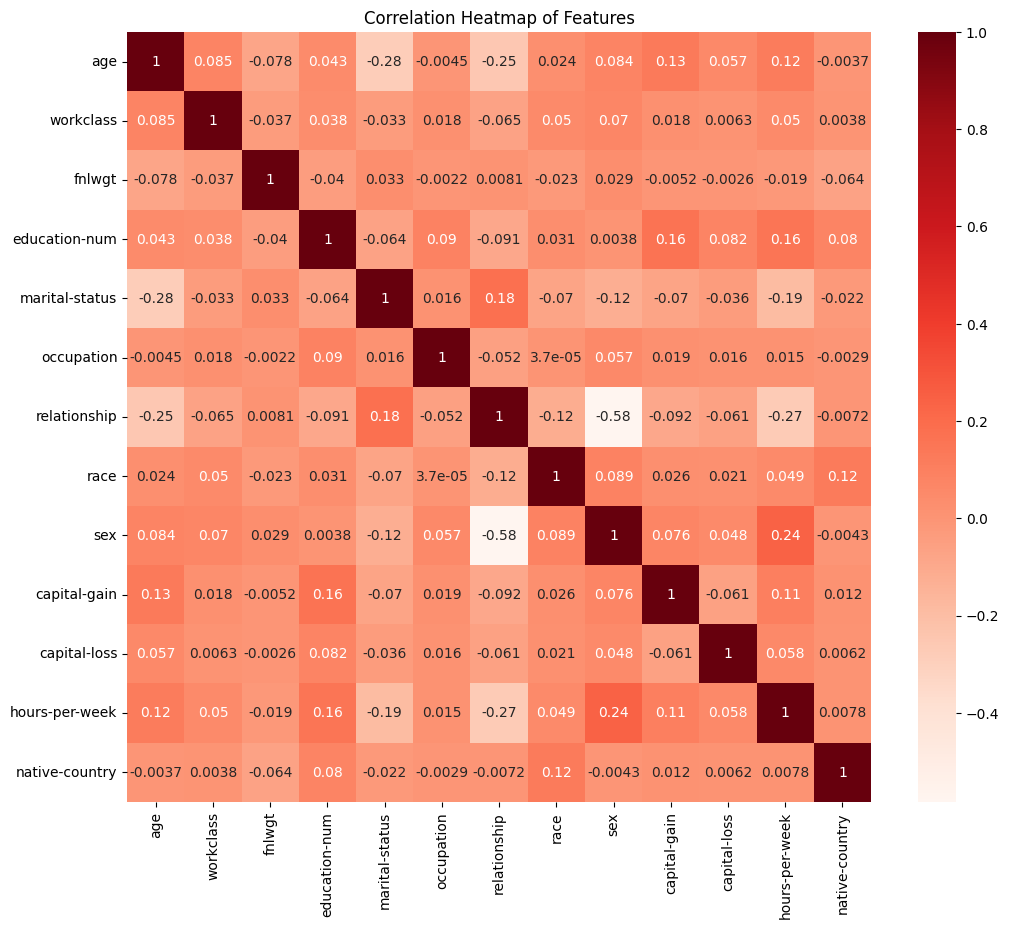

In [11]:
#Plot correlation heatmap
plt.figure(figsize = (12,10))
plt.title("Correlation Heatmap of Features")
sns.heatmap(X_scaler.corr(), cmap = 'Reds', annot = True)
plt.show()

# Principal Component Analysis(PCA)

In [12]:
# Instantiate PCA
pca = PCA()

In [13]:
# Fit and transform the data
X_pca = pca.fit_transform(X_scaler)

In [14]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display attribute names and their contributions to explained variance
df_components = pd.DataFrame({'Attribute': X_scaler.columns, 'Explained Variance Ratio': explained_variance})

print("Explained Variance Ratio for Each Attribute:\n")
print(df_components)

Explained Variance Ratio for Each Attribute:

         Attribute  Explained Variance Ratio
0              age                  0.162768
1        workclass                  0.093781
2           fnlwgt                  0.087027
3    education-num                  0.085202
4   marital-status                  0.080675
5       occupation                  0.077561
6     relationship                  0.073422
7             race                  0.071216
8              sex                  0.065742
9     capital-gain                  0.064656
10    capital-loss                  0.056338
11  hours-per-week                  0.052065
12  native-country                  0.029547


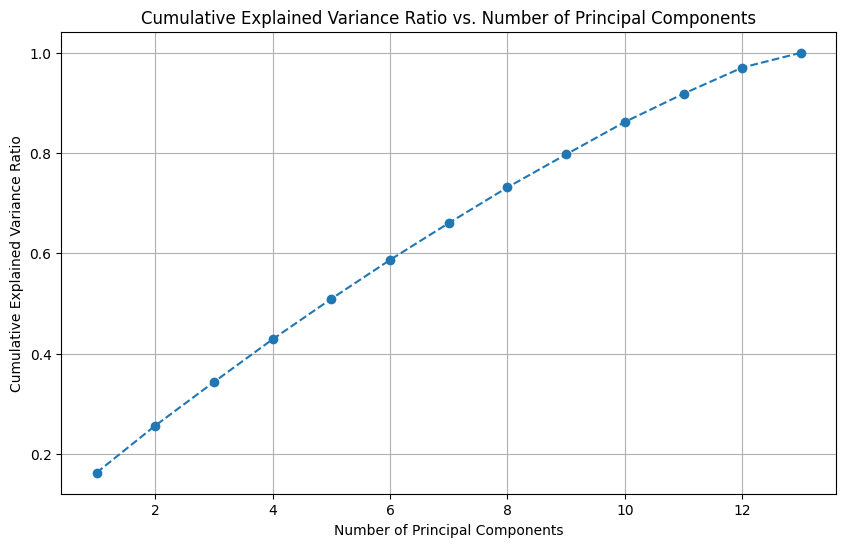

In [15]:
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [16]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaler)
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.927208,-1.108012,-0.267484,-0.600848,-0.798265,1.889814,1.769924,2.243925,0.472272,-0.573332
1,-0.765147,-0.837507,0.339950,-1.249376,-0.091661,1.741446,0.564913,0.231957,0.552597,-1.162686
2,-0.830979,0.358355,0.519841,-0.824536,-0.239417,-0.574506,-0.093180,-0.752552,-0.510830,0.331230
3,-0.562093,1.351295,1.511585,0.133366,0.072623,-0.027107,-0.695272,-0.096863,-1.193119,-1.584258
4,2.520325,1.351516,2.165505,4.388731,1.358501,0.487357,1.212086,-0.424077,0.605194,2.729558


In [17]:
# Concatenate the target variable
df = pd.concat([X_pca, y], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,income
0,-0.927208,-1.108012,-0.267484,-0.600848,-0.798265,1.889814,1.769924,2.243925,0.472272,-0.573332,0
1,-0.765147,-0.837507,0.339950,-1.249376,-0.091661,1.741446,0.564913,0.231957,0.552597,-1.162686,0
2,-0.830979,0.358355,0.519841,-0.824536,-0.239417,-0.574506,-0.093180,-0.752552,-0.510830,0.331230,0
3,-0.562093,1.351295,1.511585,0.133366,0.072623,-0.027107,-0.695272,-0.096863,-1.193119,-1.584258,0
4,2.520325,1.351516,2.165505,4.388731,1.358501,0.487357,1.212086,-0.424077,0.605194,2.729558,0


In [18]:
# Save the data
df.to_csv('Dataset/PCA_adult.csv', index=False)